### 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Essas bibliotecas são essenciais para análise de dados, visualização e machine learning.

### 2. Carregamento dos Dados

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Carrega os dados e mostra as primeiras 4 linhas para inspeção inicial.

### 3. Exploração Inicial dos Dados

In [3]:
df.info()
df.describe()
df['Outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64

- info(): mostra tipos de dados e valores nulos.
- describe(): estatísticas básicas.
- value_counts(): distribuição das classes (diabetes ou não).

### 4. Visualização dos Dados

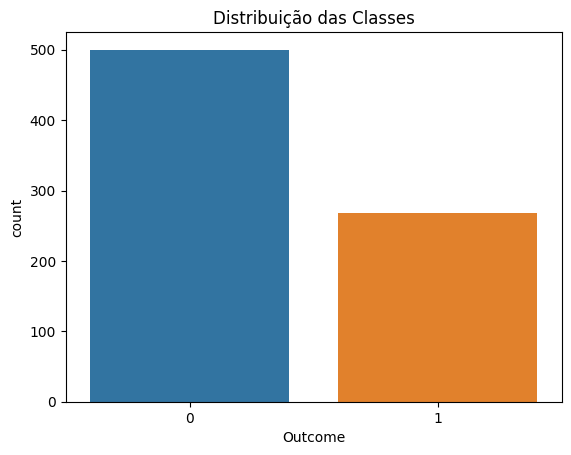

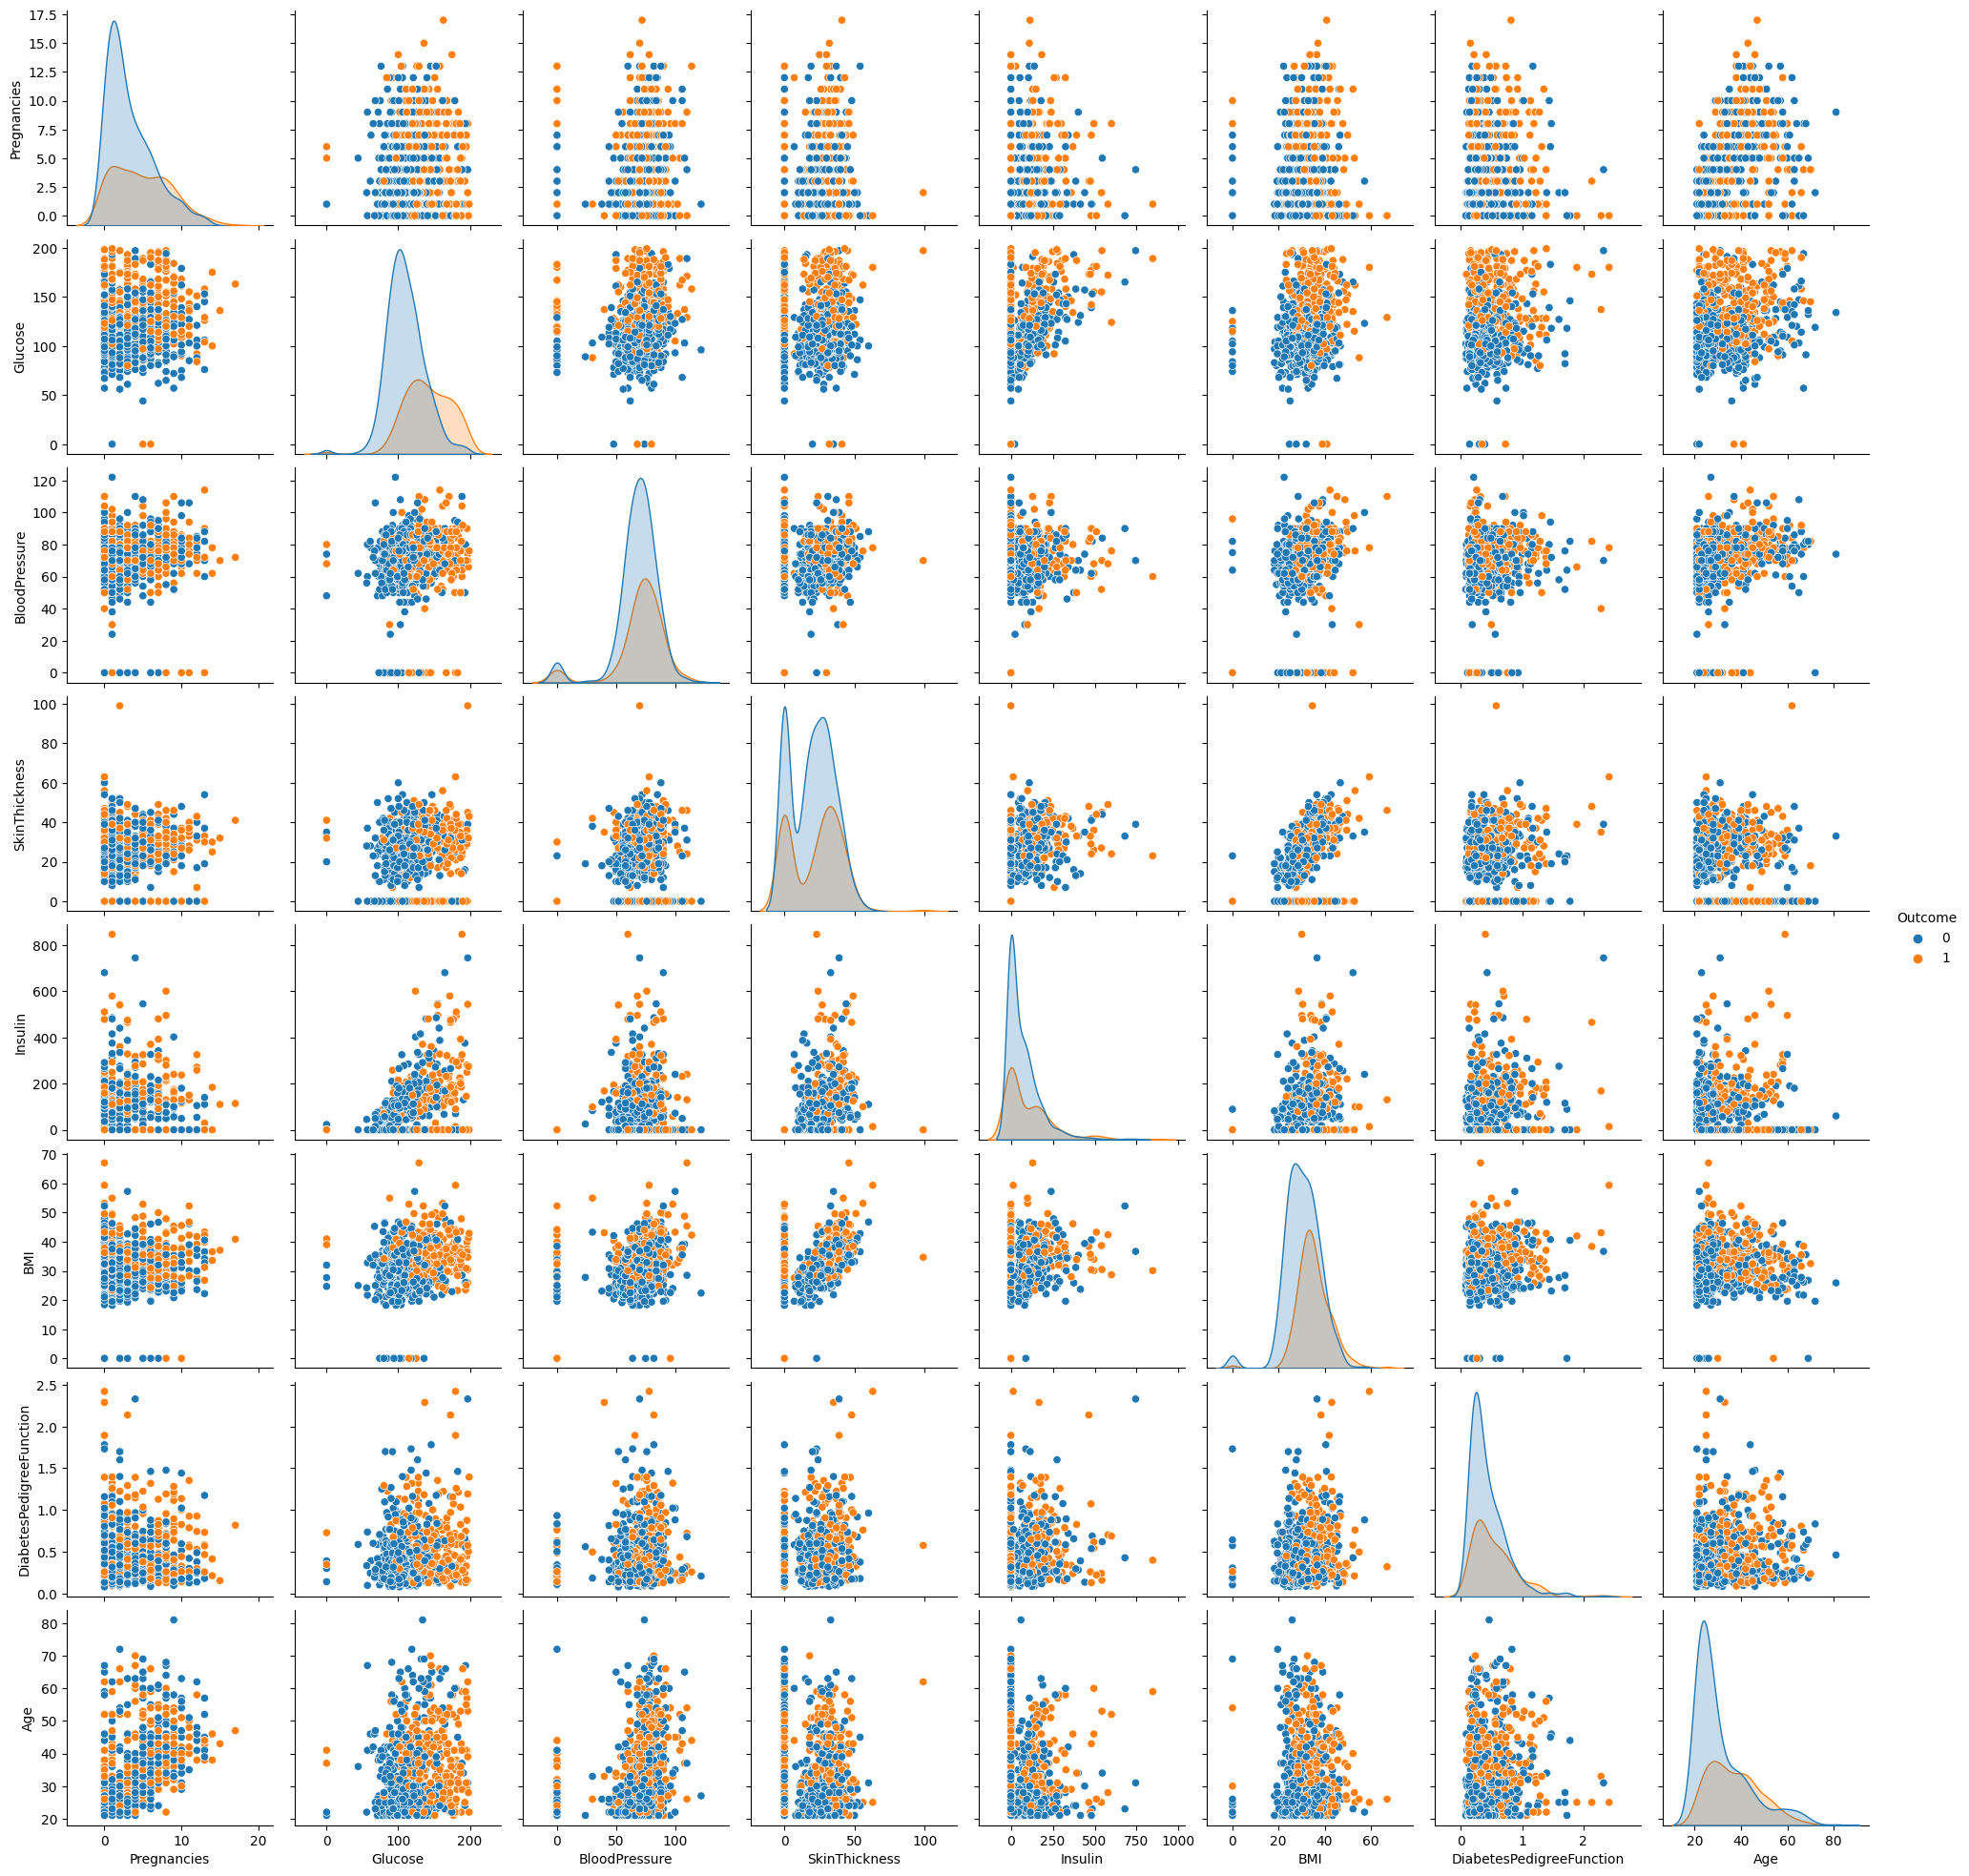

In [4]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribuição das Classes')
plt.show()

sns.pairplot(df, hue='Outcome')
plt.show()

Visualiza a distribuição das classes e a relação entre variáveis.

### 5. Limpeza e Pré-processamento dos Dados

In [5]:
# Substituir zeros por NaN em colunas onde zero não faz sentido
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

# Preencher NaN com a mediana de cada coluna
df.fillna(df.median(), inplace=True)

df.isnull().sum()  # Verifique se ainda há valores nulos

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zeros em certas colunas são fisiologicamente impossíveis, então são tratados como ausentes e preenchidos com a mediana.

### 6. Separação de Features e Alvo

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Separa as variáveis preditoras (X) da variável alvo (y).

### 7. Divisão em Treino e Teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Divide os dados em 80% treino e 20% teste, mantendo a proporção das classes.

### 8. Padronização dos Dados

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Padroniza os dados para média 0 e desvio padrão 1.

### 9. Treinamento do Modelo

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

Treina um modelo de Random Forest com os dados de treino.

In [ ]:
### 10. Avaliação do Modelo

In [ ]:
y_pred = model.predict(X_test)

print('Acurácia:', accuracy_score(y_test, y_pred))
print('\nMatriz de Confusão:\n', confusion_matrix(y_test, y_pred))
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred))

Avalia o desempenho do modelo com métricas clássicas.

### 11. Visualização da Importância das Features

In [ ]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Importância das Features')
plt.show()

In [ ]:
Mostra quais variáveis mais influenciaram o modelo.

### Resumo Visual do Pipeline

```mermaid 
flowchart TD
    A[Carregar CSV] --> B[Explorar e Visualizar]
    B --> C[Limpar e Preprocessar]
    C --> D[Separar X e y]
    D --> E[Dividir em treino e teste]
    E --> F[Padronizar]
    F --> G[Treinar Modelo]
    G --> H[Avaliar e Interpretar]

In [8]:
Mediana para dados inválidos:
--- Logistic Regression ---
Accuracy: 0.7077922077922078
Recall: 0.5
F1-score: 0.5454545454545454
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54
    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

--- Decision Tree ---
Accuracy: 0.6818181818181818
Recall: 0.48148148148148145
F1-score: 0.5148514851485149
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154

Remoção para dados inválidos:

--- Logistic Regression ---
Accuracy: 0.8354430379746836
Recall: 0.6923076923076923
F1-score: 0.7346938775510203
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.78      0.69      0.73        26

    accuracy                           0.84        79
   macro avg       0.82      0.80      0.81        79
weighted avg       0.83      0.84      0.83        79

--- Decision Tree ---
Accuracy: 0.7215189873417721
Recall: 0.6538461538461539
F1-score: 0.6071428571428571
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        53
           1       0.57      0.65      0.61        26

    accuracy                           0.72        79
   macro avg       0.69      0.70      0.70        79
weighted avg       0.73      0.72      0.73        79

PS D:\OneDrive\vagner-desktop\Documentos\DevZone\tech-challenge-fase-1>



















IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)